In [1]:
import seaborn as sns
import matplotlib as plt

In [2]:
flights = sns.load_dataset("flights")

In [3]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


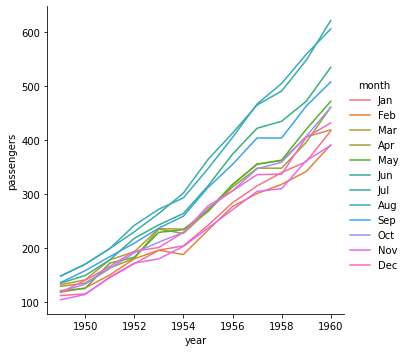

In [4]:
sns.relplot(data=flights, x = "year", y = "passengers", hue = "month", kind = "line")

Similar functions for similar tasks

The seaborn namespace is flat; all of the functionality is accessible at the top level. But the code itself is hierarchically structured, with modules of functions that achieve similar visualization goals through different means. Most of the docs are structured around these modules: you’ll encounter names like “relational”, “distributional”, and “categorical”.

For example, the distributions module defines functions that specialize in representing the distribution of datapoints. This includes familiar methods like the histogram:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

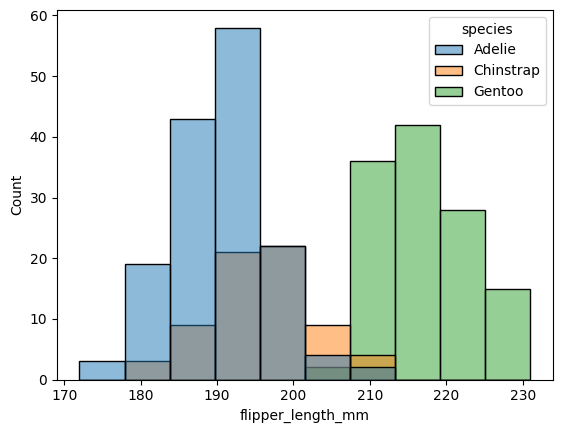

In [5]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

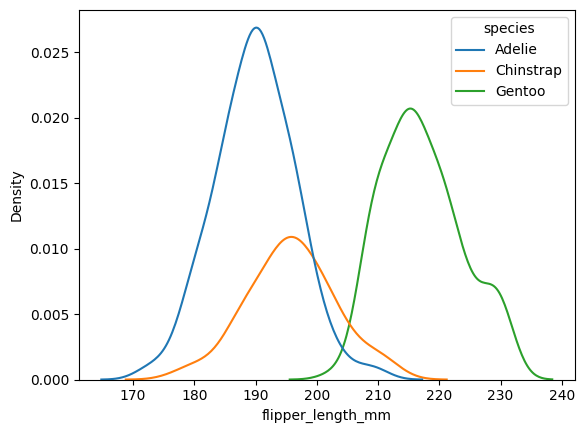

In [6]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue = "species")

Figure-level vs. axes-level functions

In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

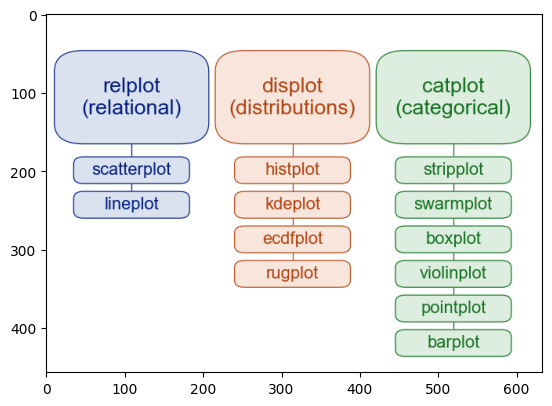

In [7]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('function_overview_8_0.png')
 
# Output Images
plt.imshow(img)

For example, displot() is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as histplot() behind the scenes:

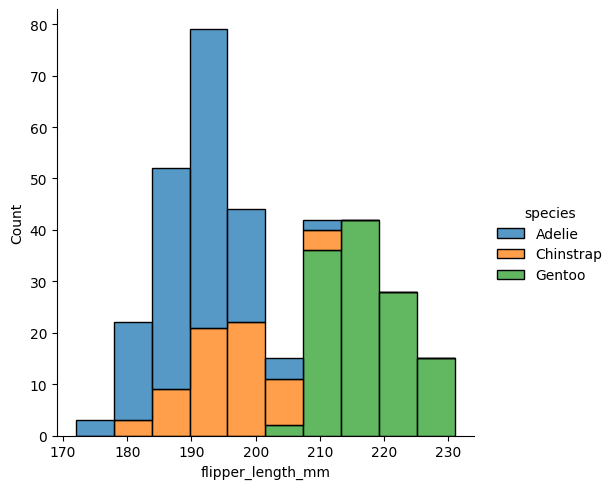

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

To draw a kernel density plot instead, using the same code as kdeplot(), select it using the kind parameter:

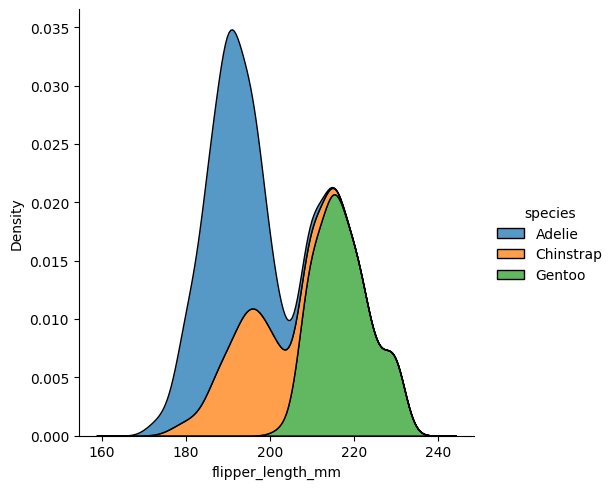

In [9]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

Axes-level functions make self-contained plots

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

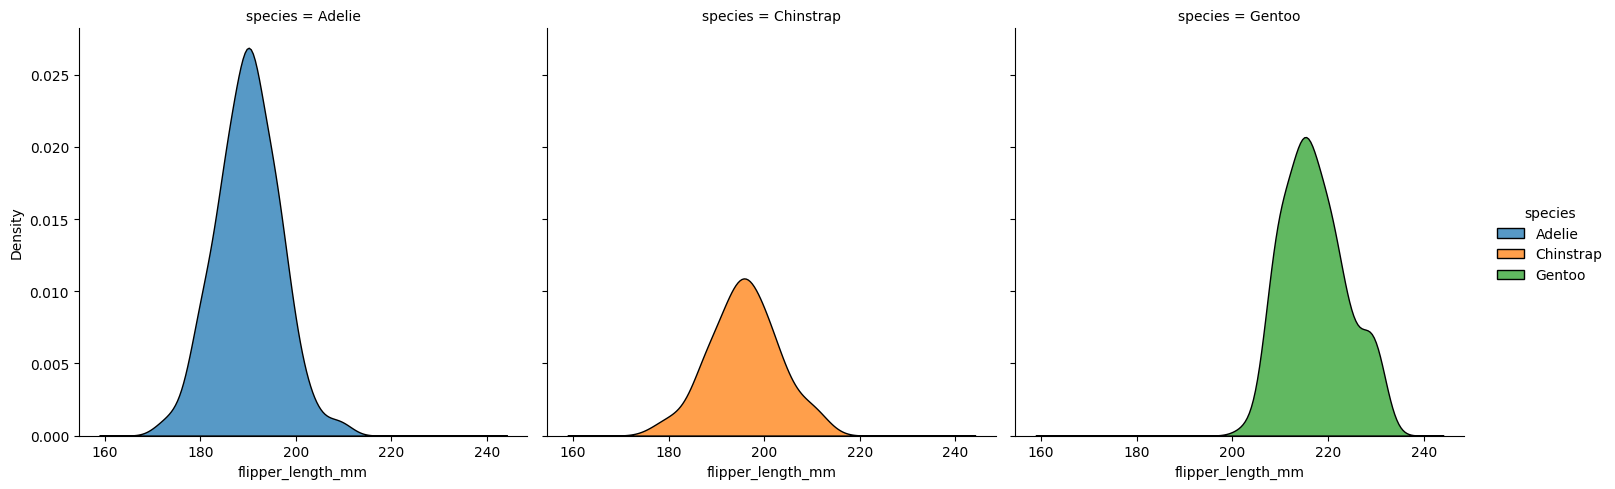

In [10]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species", kind="kde", multiple="stack")

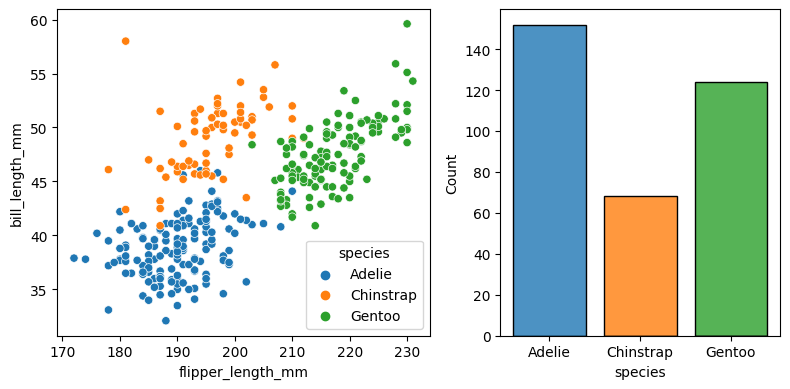

In [15]:
f, axs = plt.subplots(1, 2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species",shrink=.8,alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

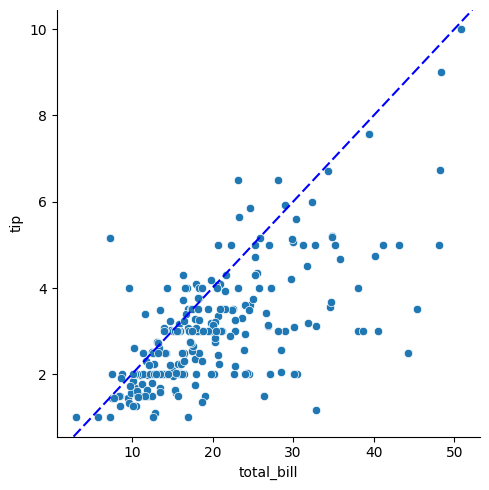

In [16]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10,2), slope=.2, color="b", dashes=(5,2))

Customizing plots from a figure-level function¶

The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

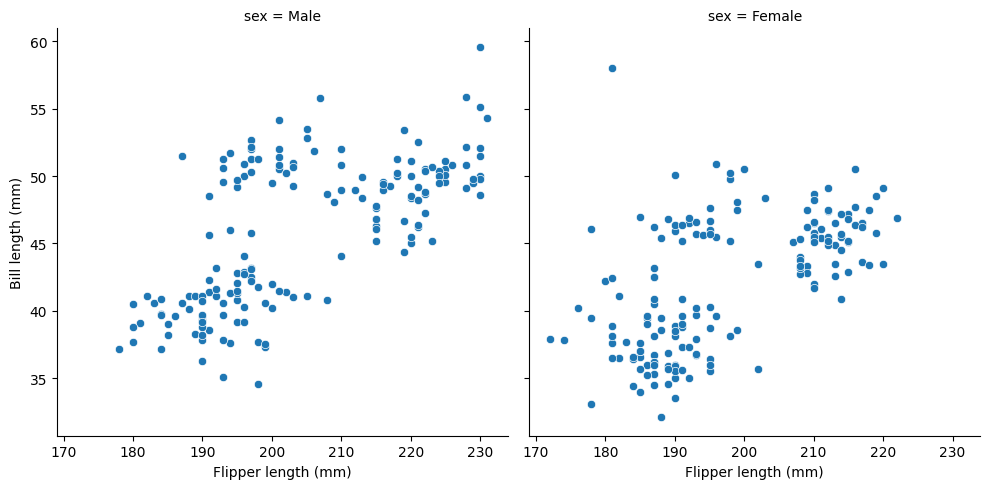

In [17]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

# Specifying figure sizes

To increase or decrease the size of a matplotlib plot, you set the width and height of the entire figure, either in the global rcParams, while setting up the plot (e.g. with the figsize parameter of matplotlib.pyplot.subplots()), or by calling a method on the figure object (e.g. matplotlib.Figure.set_size_inches()). When using an axes-level function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure.

When using a figure-level function, there are several key differences. First, the functions themselves have parameters to control the figure size (although these are actually parameters of the underlying FacetGrid that manages the figure). Second, these parameters, height and aspect, parameterize the size slightly differently than the width, height parameterization in matplotlib (using the seaborn parameters, width = height * apsect). Most importantly, the parameters correspond to the size of each subplot, rather than the size of the overall figure.

To illustrate the difference between these approaches, here is the default output of matplotlib.pyplot.subplots() with one subplot:

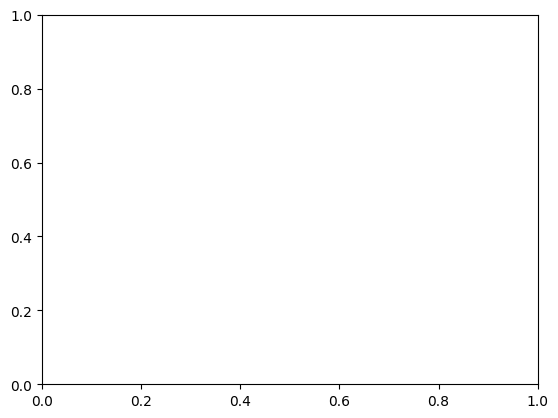

In [18]:
f, ax = plt.subplots()

A figure with multiple columns will have the same overall size, but the axes will be squeezed horizontally to fit in the space:

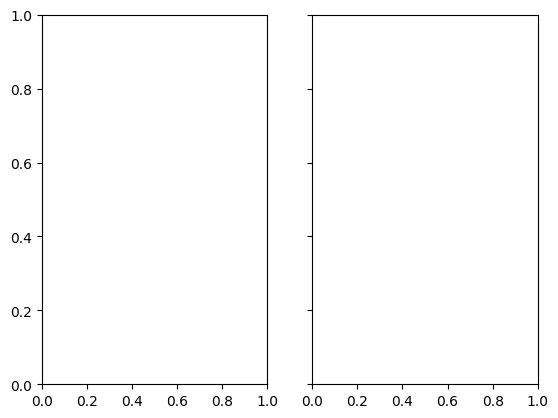

In [21]:
f, ax = plt.subplots(1,2,sharey=True)

In contrast, a plot created by a figure-level function will be square. To demonstrate that, let’s set up an empty plot by using FacetGrid directly. This happens behind the scenes in functions like relplot(), displot(), or catplot():

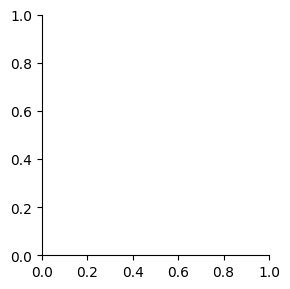

In [25]:
g = sns.FacetGrid(data=penguins)

When additional columns are added, the figure itself will become wider, so that its subplots have the same size and shape:

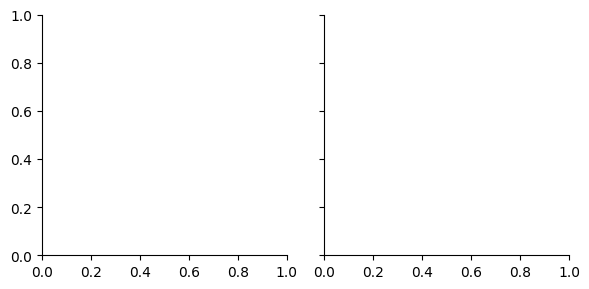

In [27]:
g = sns.FacetGrid(penguins, col="sex")

And you can adjust the size and shape of each subplot without accounting for the total number of rows and columns in the figure:

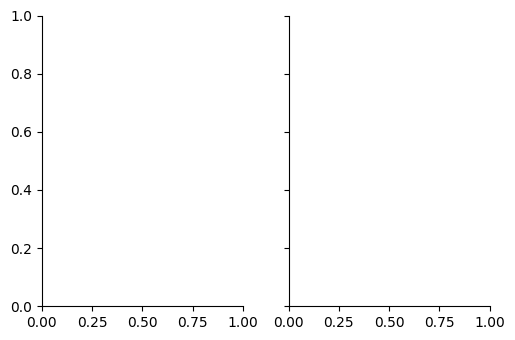

In [28]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

The upshot is that you can assign faceting variables without stopping to think about how you’ll need to adjust the total figure size. A downside is that, when you do want to change the figure size, you’ll need to remember that things work a bit differently than they do in matplotlib

# Relative merits of figure-level functions

Here is a summary of the pros and cons that we have discussed above:

## Advantages	

Easy faceting by data variables

Legend outside of plot by default

Easy figure-level customization

Different figure size parameterization


## Drawbacks

Many parameters not in function signature

Cannot be part of a larger matplotlib figure

Different API from matplotlib

Different figure size parameterization


On balance, the figure-level functions add some additional complexity that can make things more confusing for beginners, but their distinct features give them additional power. The tutorial documentaion mostly uses the figure-level functions, because they produce slightly cleaner plots, and we generally recommend their use for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it’s recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions

# Combining multiple views on the data

Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.

jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

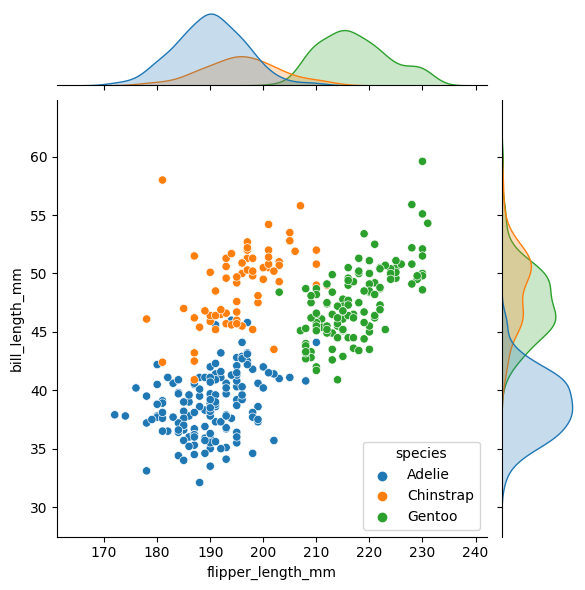

In [33]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

pairplot() is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

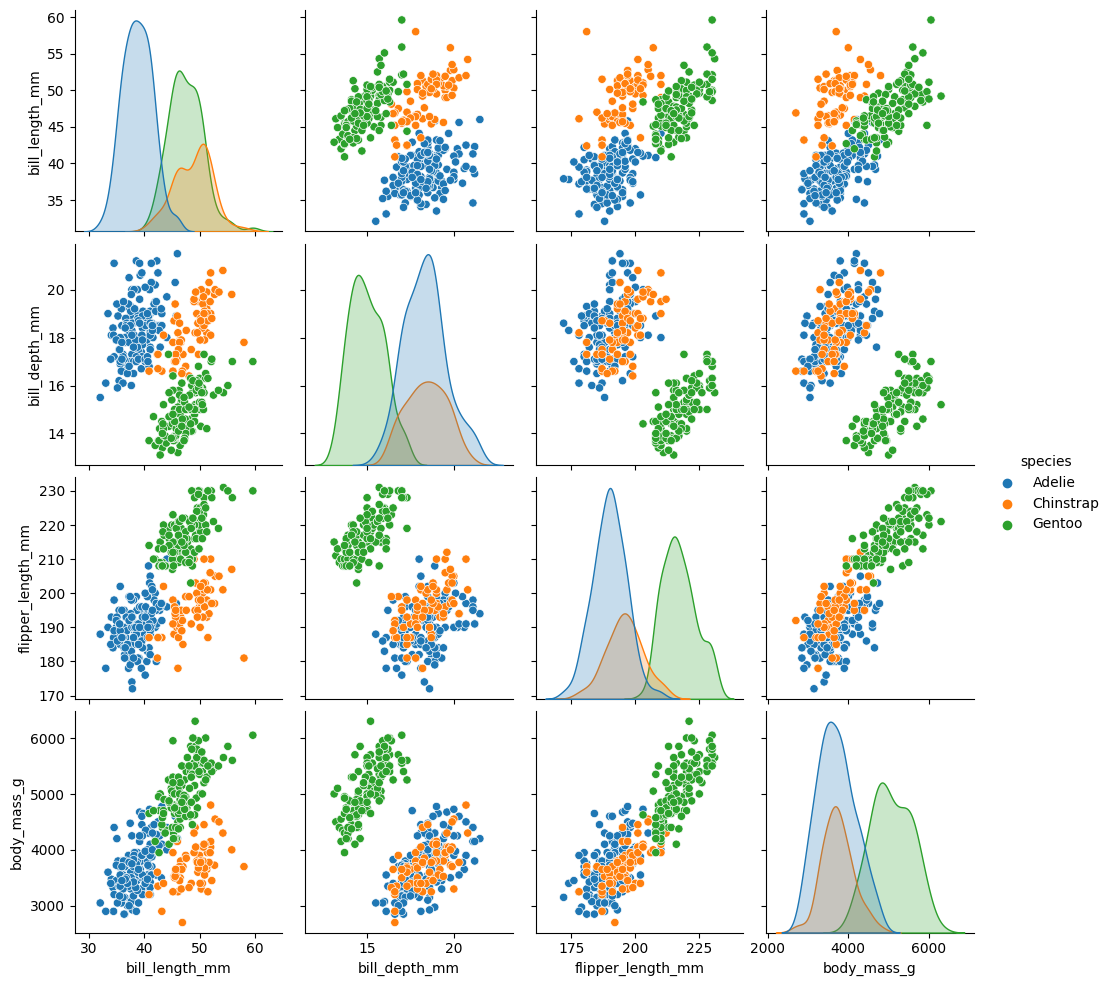

In [34]:
sns.pairplot(data=penguins, hue="species")

Behind the scenes, these functions are using axes-level functions that you have already met (scatterplot() and kdeplot()), and they also have a kind parameter that lets you quickly swap in a different representation:

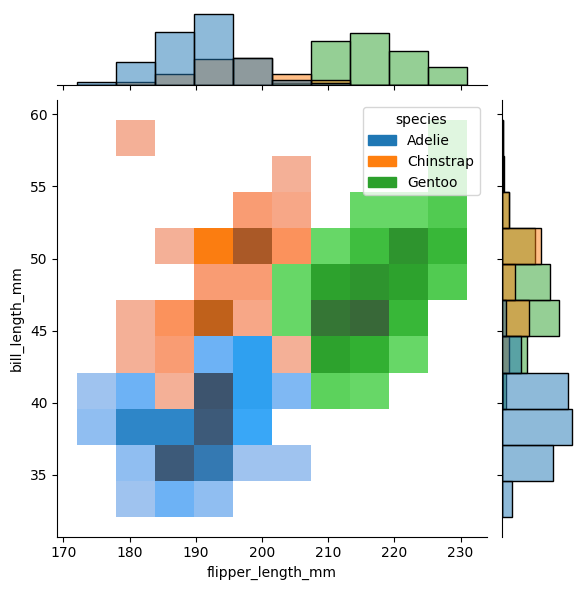

In [35]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

# Practice with different datasets

In [39]:
sns.utils.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [41]:
titanic = sns.load_dataset("titanic")

In [68]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


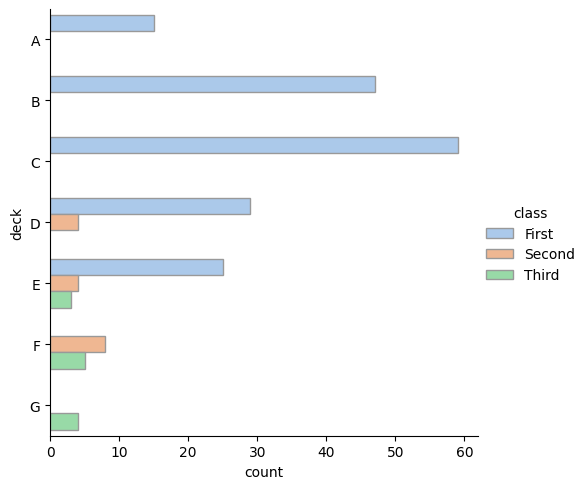

In [121]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

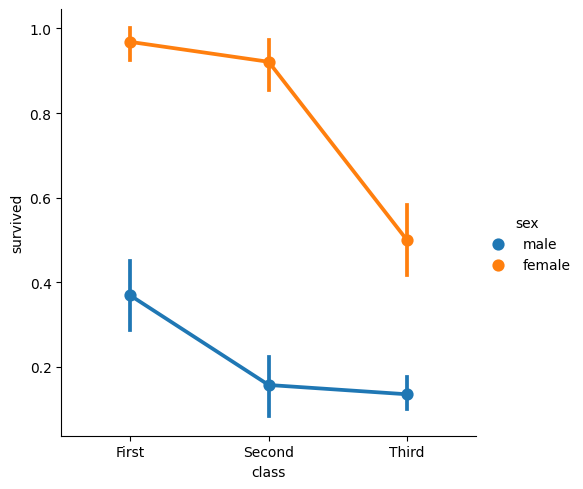

In [134]:
sns.catplot(data=titanic, y="survived", x ="class", hue="sex", kind="point")